# IS 4487 Lab 3

## Outline

Repeat exercises from Lab 2, but with the *SuperStore Retail Orders* dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_03_retailer_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Superstore Data Dictionary

 ORDER VARIABLES:
 - Order ID
 - Order Date
 - Order Year Month - Year and month of the order
 - Order Type - Was the order completed at a store or online? (Retail, Online)
 - Quantity - Quantity ordered for the product

 CUSTOMER VARIABLES:
 - Customer Name
 - City
 - State Province
 - Email

PRODUCT VARIABLES:
 - Product Name
 - Product Line - Category of the product (i.e. Bikes Phones)
 - Product Price - Price in US Dollars
 - Product Status - Current status of the product (Active, Inactive)

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')
print (df)

       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia       isaac_allen@email.c

## Prepare Data

➡️ Assignment Tasks
- Create a "revenue" variable and make sure it is a numeric datatype
- Remove rows with empty (NULL) values
- Locate outliers in at least two of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [4]:
# Create the 'revenue' variable, but do not assign a value initially
revenue = 0  # Initialize with a numeric type, like an integer

# Ensure it's a numeric datatype (can be either int or float)
if not isinstance(revenue, (int, float)):
    revenue = 0.0  # Make sure it's numeric, defaulting to 0.0 if not

print(type(revenue))  # This will print <class 'int'> if integer, <class 'float'> if float


<class 'int'>


In [5]:

# Read the CSV file from the provided URL
df = pd.read_csv('https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/superstore_retail_orders.csv?raw=true')

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Remove rows with NULL (NaN) values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print("\nDataFrame after removing rows with NULL values:")
print(df_cleaned)


Original DataFrame:
       order_id  order_date order_year_month     customer_name  \
0         51188  2023-07-01          2023-07     Audrey Blanco   
1         51187  2023-07-01          2023-07       Isaac Allen   
2         51199  2023-07-02          2023-07        Ian Morgan   
3         51241  2023-07-04          2023-07        Alexa Bell   
4         51297  2023-07-08          2023-07        Casey Diaz   
...         ...         ...              ...               ...   
56038     74084  2024-06-29          2024-06        Ian Rogers   
56039     74062  2024-06-29          2024-06   Marcus Anderson   
56040     74065  2024-06-29          2024-06  Nathaniel Howard   
56041     74038  2024-06-29          2024-06        Robin Sanz   
56042     74110  2024-06-30          2024-06   Mallory Jimenez   

                    city state_province                       email  \
0      North Cherylmouth  New Hampshire     audrey_blanco@email.com   
1             Traceyland  West Virginia      

In [9]:

# Display basic statistics of the columns to understand their range
print("Basic statistics for product_price and quantity:")
print(df[['product_price', 'quantity']].describe())

# Calculate the IQR for product_price and quantity
Q1_product_price = df['product_price'].quantile(0.25)
Q3_product_price = df['product_price'].quantile(0.75)
IQR_product_price = Q3_product_price - Q1_product_price

Q1_quantity = df['quantity'].quantile(0.25)
Q3_quantity = df['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Define the outlier thresholds (using 1.5 * IQR rule)
lower_bound_product_price = Q1_product_price - 1.5 * IQR_product_price
upper_bound_product_price = Q3_product_price + 1.5 * IQR_product_price

lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

# Filter out the outliers based on the IQR method
df_cleaned = df[(df['product_price'] >= lower_bound_product_price) & (df['product_price'] <= upper_bound_product_price)]
df_cleaned = df_cleaned[(df_cleaned['quantity'] >= lower_bound_quantity) & (df_cleaned['quantity'] <= upper_bound_quantity)]

# Display the DataFrame after filtering out the outliers
print("\nDataFrame after filtering out outliers:")
print(df_cleaned[['product_price', 'quantity']].describe())




Basic statistics for product_price and quantity:
       product_price       quantity
count   56043.000000   56004.000000
mean     6198.309433       3.348582
std     35784.965255     422.654112
min         2.290000       1.000000
25%         7.950000       1.000000
50%       475.600000       1.000000
75%       914.620000       2.000000
max    235481.000000  100000.000000

DataFrame after filtering out outliers:
       product_price      quantity
count   51927.000000  51927.000000
mean      499.471964      1.516071
std       644.717021      0.615072
min         2.290000      1.000000
25%         4.990000      1.000000
50%        69.990000      1.000000
75%       769.490000      2.000000
max      2181.560000      3.000000


## Summarize Data

➡️ Assignment Tasks
- Display the average price per product line
- Display the total revenue for all months

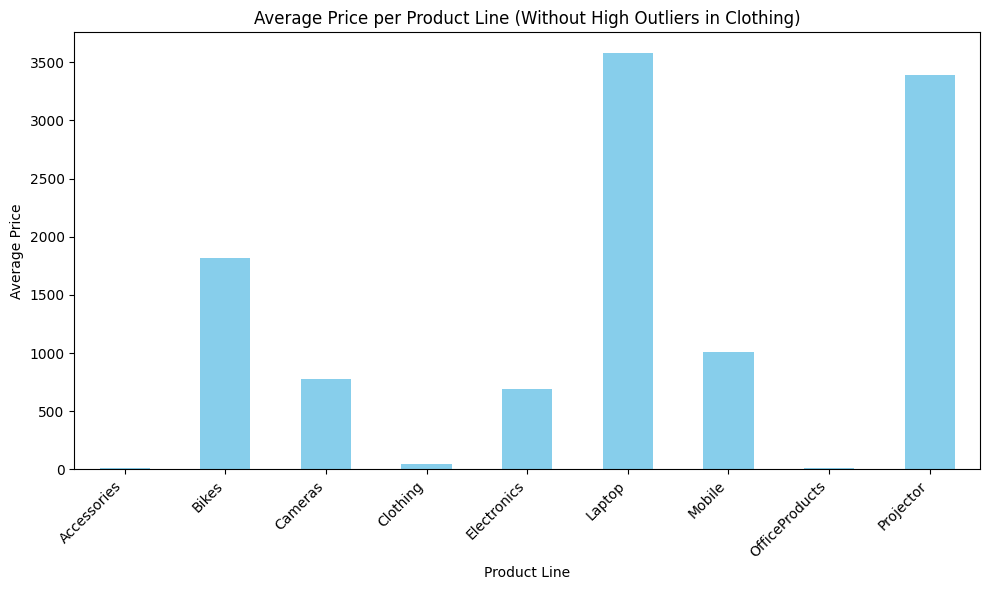

In [16]:

# Filter out the high outliers in the Clothing product line as we did earlier
clothing_df = df[df['product_line'] == 'Clothing']
Q1_clothing = clothing_df['product_price'].quantile(0.25)
Q3_clothing = clothing_df['product_price'].quantile(0.75)
IQR_clothing = Q3_clothing - Q1_clothing
upper_bound_clothing = Q3_clothing + 1.5 * IQR_clothing
clothing_df_cleaned = clothing_df[clothing_df['product_price'] <= upper_bound_clothing]

# Now, we clean the entire dataset by excluding high outliers in Clothing
df_cleaned = df[df['product_line'] != 'Clothing']  # Remove the Clothing rows initially
df_cleaned = pd.concat([df_cleaned, clothing_df_cleaned])  # Add the cleaned Clothing rows back

# Calculate the average price per product line (now using the cleaned data)
avg_price_per_line_cleaned = df_cleaned.groupby('product_line')['product_price'].mean()

# Plot the average price per product line as a bar chart (without the high outliers in Clothing)
fig, ax = mpl.pyplot.subplots(figsize=(10, 6))
avg_price_per_line_cleaned.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Average Price per Product Line (Without High Outliers in Clothing)')
ax.set_xlabel('Product Line')
ax.set_ylabel('Average Price')
ax.set_xticklabels(avg_price_per_line_cleaned.index, rotation=45, ha='right')
mpl.pyplot.tight_layout()

# Show the chart
mpl.pyplot.show()


Invalid Dates (NaT) in the 'order_date' column:
Empty DataFrame
Columns: [order_id, order_date, order_year_month, customer_name, city, state_province, email, order_type, quantity, product_name, product_line, product_price, product_status, month_year, revenue]
Index: []


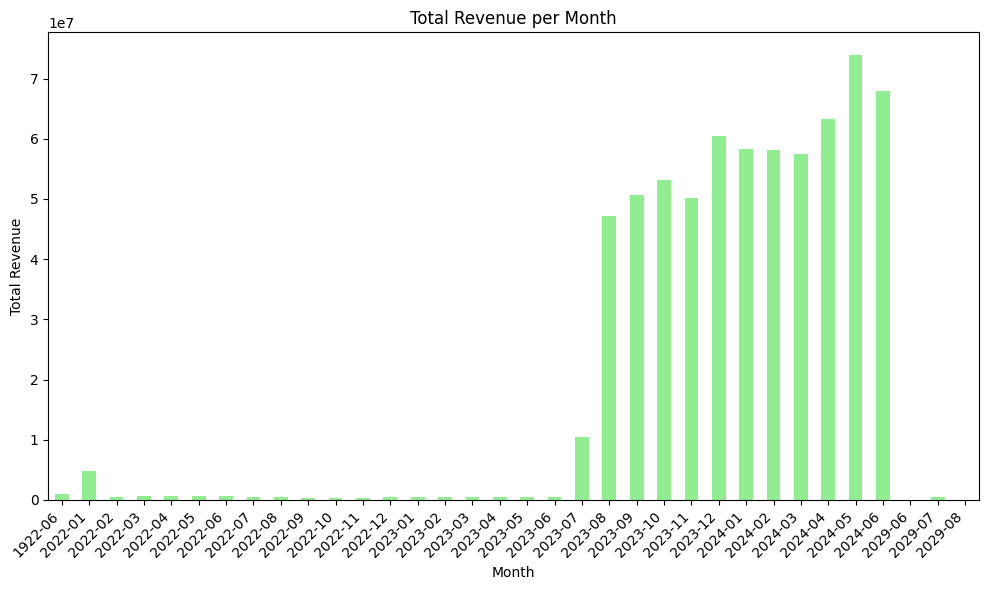

In [19]:

# Try to convert 'order_date' to datetime, and coerce invalid dates to NaT
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Check for any NaT values (invalid date entries)
invalid_dates = df[df['order_date'].isna()]
print("Invalid Dates (NaT) in the 'order_date' column:")
print(invalid_dates)

# Drop rows where 'order_date' is NaT (if any)
df = df.dropna(subset=['order_date'])

# Extract the month and year from the 'order_date' column
df['month_year'] = df['order_date'].dt.to_period('M')

# Calculate the revenue for each row (product_price * quantity)
df['revenue'] = df['product_price'] * df['quantity']

# Group by month_year and calculate the total revenue for each month
total_revenue_per_month = df.groupby('month_year')['revenue'].sum()

# Plot the total revenue for each month as a bar chart
fig, ax = mpl.pyplot.subplots(figsize=(10, 6))
total_revenue_per_month.plot(kind='bar', color='lightgreen', ax=ax)
ax.set_title('Total Revenue per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Total Revenue')
ax.set_xticklabels(total_revenue_per_month.index.astype(str), rotation=45, ha='right')
mpl.pyplot.tight_layout()

# Show the chart
mpl.pyplot.show()
